In [3]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plot
import tensorflow as tf

In [4]:
mat = loadmat('./Data/train_32x32.mat')
trainX = mat['X']
trainY = mat['y']

In [5]:
print(trainX.shape)
trainX = np.transpose(trainX,(3,0,1,2))
print(trainX.shape)
print(trainY.shape)

(32, 32, 3, 73257)
(73257, 32, 32, 3)
(73257, 1)


## Choose samples for train, test and validation

In [6]:
def create_n_samples(x_original, y_original, no_of_class_samples=100, no_of_classes=10):
    hmap = {}
    nums_list = np.arange(1,no_of_classes+1)
    X = []
    Y = []
    for num in nums_list:
        hmap[num] = 0
    
    for idx in range(len(x_original)):
        label = y_original[idx][0]
        if hmap[label] < no_of_class_samples:
            Y.append(label)
            hmap[label] = hmap[label] + 1
            X.append(x_original[idx])
            
    return np.asarray(X), np.asarray(Y)
    

In [7]:
no_of_training_samples = 1000
no_of_classes = 10
trX, trY = create_n_samples(trainX, trainY, no_of_training_samples, no_of_classes)
trY[trY==10] = 0

In [8]:
trY[trY==0].shape

(1000,)

4


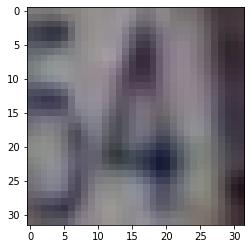

In [9]:
idx=998
print(trY[idx])
plot.imshow(trX[idx])
plot.show()

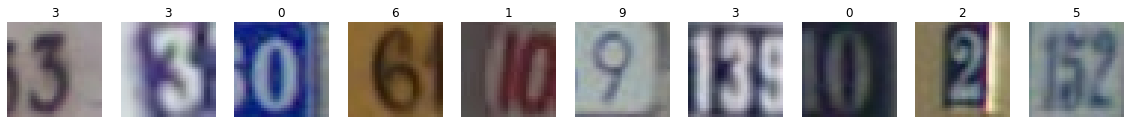

In [10]:
plot.rcParams["figure.figsize"] = (20,20)
f, ax = plot.subplots(1, 10)

for i, j in enumerate(np.random.randint(0, trY.shape[0], size=10)):
    ax[i].axis('off')
    ax[i].set_title(trY[j])
    ax[i].imshow(trX[j,:,:,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

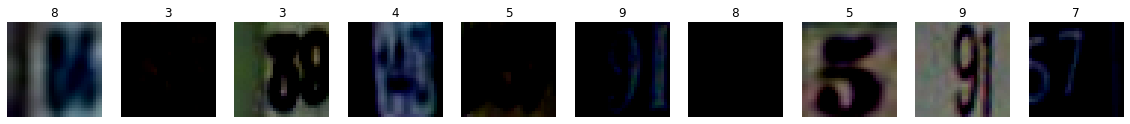

In [11]:
train_data = trX.astype('float32') / 128.0 - 1
f, ax = plot.subplots(1, 10)

for i, j in enumerate(np.random.randint(0, trY.shape[0], size=10)):
    ax[i].axis('off')
    ax[i].set_title(trY[j])
    ax[i].imshow(train_data[j,:,:,:])

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
model = Sequential()

In [60]:
model.add(Conv2D(32,(5,5), strides=(1,1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), strides=(1,1), activation='relu'))

In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 128)         73856     
Total params: 94,784
Trainable params: 94,784
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)             

In [64]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(trX, trY, epochs=10)

Epoch 1/10
10000/10000 [==============================] - 17s 2ms/sample - loss: 1.6058 - acc: 0.5710
Epoch 2/10
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.6781 - acc: 0.7970
Epoch 3/10
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.5026 - acc: 0.8433
Epoch 4/10
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.4361 - acc: 0.8615
Epoch 5/10
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.3375 - acc: 0.8924
Epoch 6/10
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.2785 - acc: 0.9141
Epoch 7/10
10000/10000 [==============================] - 15s 2ms/sample - loss: 0.2524 - acc: 0.9193
Epoch 8/10
10000/10000 [==============================] - 16s 2ms/sample - loss: 0.2282 - acc: 0.9285
Epoch 9/10
10000/10000 [==============================] - 15s 1ms/sample - loss: 0.2318 - acc: 0.9293
Epoch 10/10
10000/10000 [==============================] - 15s 2ms/sample - loss: 